<a href="https://colab.research.google.com/github/profugohenrique/spoincd/blob/master/INCDDiagnosticoExemploCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

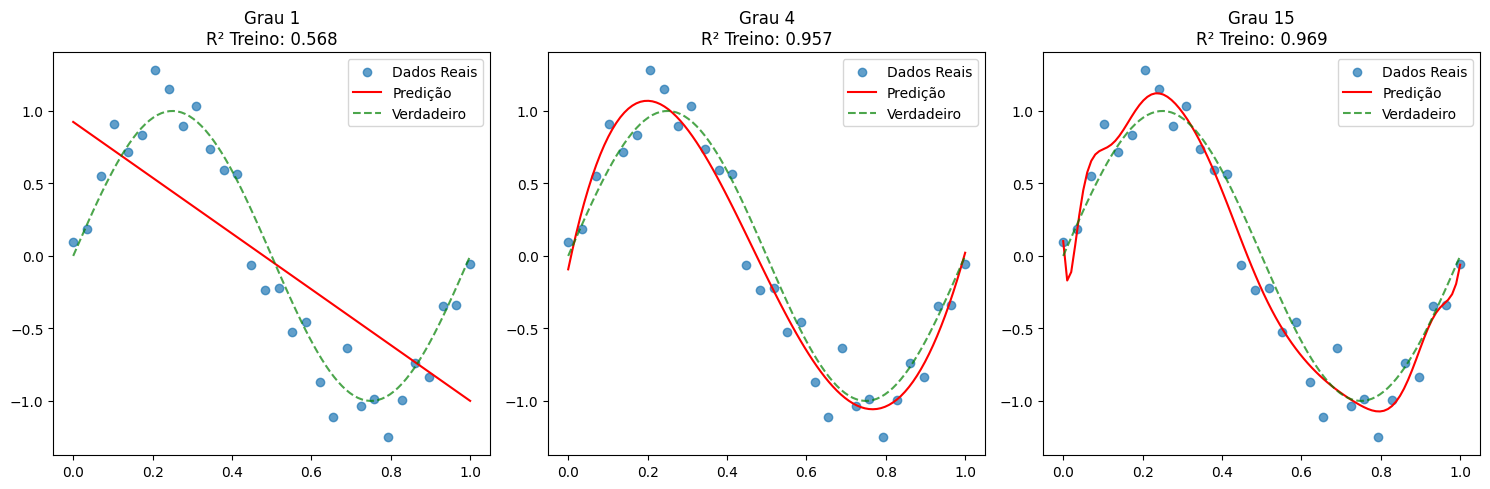

In [5]:
# Demo Interativa - Visualizando Overfitting/Underfitting
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Gerar dados sintéticos
np.random.seed(42)
X = np.linspace(0, 1, 30)
y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.2, 30)

plt.figure(figsize=(15, 5))

# Modelos com diferentes complexidades
degrees = [1, 4, 15]
for i, degree in enumerate(degrees):
    plt.subplot(1, 3, i+1)

    # Gerar pontos para curva suave
    X_test = np.linspace(0, 1, 100)

    # Treinar modelo polinomial
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_test_poly)

    # Plot
    plt.scatter(X, y, alpha=0.7, label='Dados Reais')
    plt.plot(X_test, y_pred, 'r-', label='Predição')
    plt.plot(X_test, np.sin(2 * np.pi * X_test), 'g--', alpha=0.7, label='Verdadeiro')

    # Calcular métricas
    train_score = model.score(X_poly, y)
    plt.title(f'Grau {degree}\nR² Treino: {train_score:.3f}')
    plt.legend()

plt.tight_layout()
plt.show()

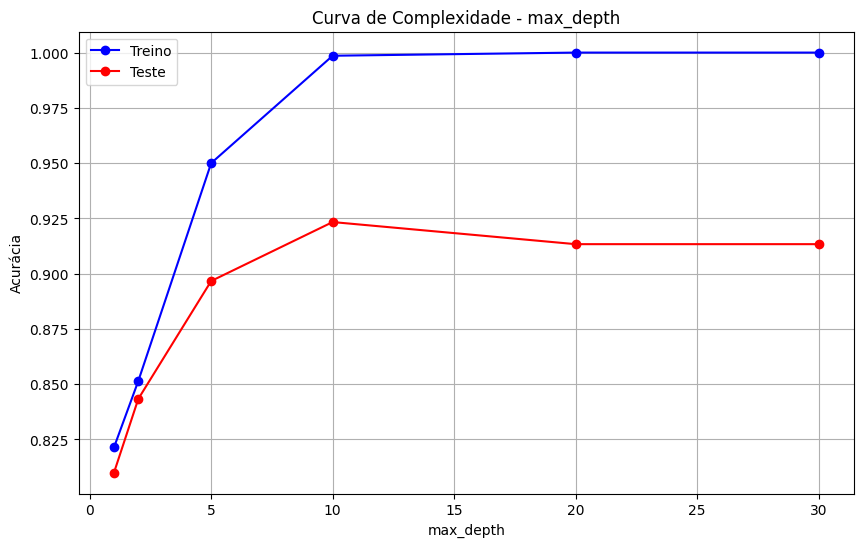

In [2]:
# Framework completo de diagnóstico
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

class ModelDiagnoser:
    def __init__(self):
        self.results = {}

    def generate_complexity_curve(self, model, X, y, param_name, param_range):
        """Curva de complexidade do modelo"""
        train_scores = []
        test_scores = []

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42
        )

        for param in param_range:
            if hasattr(model, 'set_params'):
                model.set_params(**{param_name: param})
            model.fit(X_train, y_train)

            train_pred = model.predict(X_train)
            test_pred = model.predict(X_test)

            train_scores.append(accuracy_score(y_train, train_pred))
            test_scores.append(accuracy_score(y_test, test_pred))

        # Plot
        plt.figure(figsize=(10, 6))
        plt.plot(param_range, train_scores, 'o-', label='Treino', color='blue')
        plt.plot(param_range, test_scores, 'o-', label='Teste', color='red')
        plt.xlabel(param_name)
        plt.ylabel('Acurácia')
        plt.title(f'Curva de Complexidade - {param_name}')
        plt.legend()
        plt.grid(True)
        plt.show()

        return train_scores, test_scores

# Exemplo prático
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                          n_redundant=10, random_state=42)

diagnoser = ModelDiagnoser()
model = RandomForestClassifier(random_state=42)

# Analisar impacto da profundidade máxima
max_depths = [1, 2, 5, 10, 20, 30, None]
train_scores, test_scores = diagnoser.generate_complexity_curve(
    model, X, y, 'max_depth', max_depths
)

In [4]:
##Diagnostico de modelos
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=1000, random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    print(f"{name}: AUC médio = {scores.mean():.3f} (+/- {scores.std():.3f})")


Árvore de Decisão: AUC médio = 0.900 (+/- 0.037)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Regressão Logística: AUC médio = 0.993 (+/- 0.005)
Random Forest: AUC médio = 0.991 (+/- 0.006)
